<a href="https://colab.research.google.com/github/Hyenni/practice_colab/blob/housing/housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import tarfile
from six.moves import urllib

In [0]:
DATA_DIR = "./datasets"

#디렉토리 만들기
if not os.path.isdir(DATA_DIR):
  os.makedirs(DATA_DIR)
  
#housing.tgz 다운로드
DATA_PATH = os.path.join(DATA_DIR, 'housing.tgz')
urllib.request.urlretrieve("https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.tgz", DATA_PATH)

#압축 풀기
tgz_file = tarfile.open(DATA_PATH)
tgz_file.extractall(path=DATA_DIR)
tgz_file.close()


In [0]:
#csv 파일 읽기
import pandas as pd

def load_data(file_dir=DATA_DIR):
    csv_file = os.path.join(file_dir, 'housing.csv')
    return pd.read_csv(csv_file)
  
housing = load_data()

In [4]:
type(housing)

pandas.core.frame.DataFrame

In [5]:
#처음 5개의 행 살펴보기
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [6]:
!ls -al

total 1412
drwxr-xr-x 1 root root    4096 Nov 27 02:57 .
drwxr-xr-x 1 root root    4096 Nov 27 02:09 ..
drwxr-xr-x 4 root root    4096 Nov 21 17:26 .config
drwxr-xr-x 2 root root    4096 Nov 27 02:57 datasets
-rw-r--r-- 1 root root 1423529 Nov 27 02:41 housing.csv
drwxr-xr-x 2 root root    4096 Nov 21 17:36 sample_data


In [7]:
!mv housing.csv housing2.csv
!ls -al

total 1412
drwxr-xr-x 1 root root    4096 Nov 27 02:59 .
drwxr-xr-x 1 root root    4096 Nov 27 02:09 ..
drwxr-xr-x 4 root root    4096 Nov 21 17:26 .config
drwxr-xr-x 2 root root    4096 Nov 27 02:57 datasets
-rw-r--r-- 1 root root 1423529 Nov 27 02:41 housing2.csv
drwxr-xr-x 2 root root    4096 Nov 21 17:36 sample_data


In [9]:
housing2 = pd.read_csv('housing2.csv')
housing2.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [10]:
#데이터에 대한 간략한 설명 보기
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [11]:
#범주형(object) 데이터의 카테고리 확인
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [12]:
#숫자형 데이터 살펴보기 (summary)
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

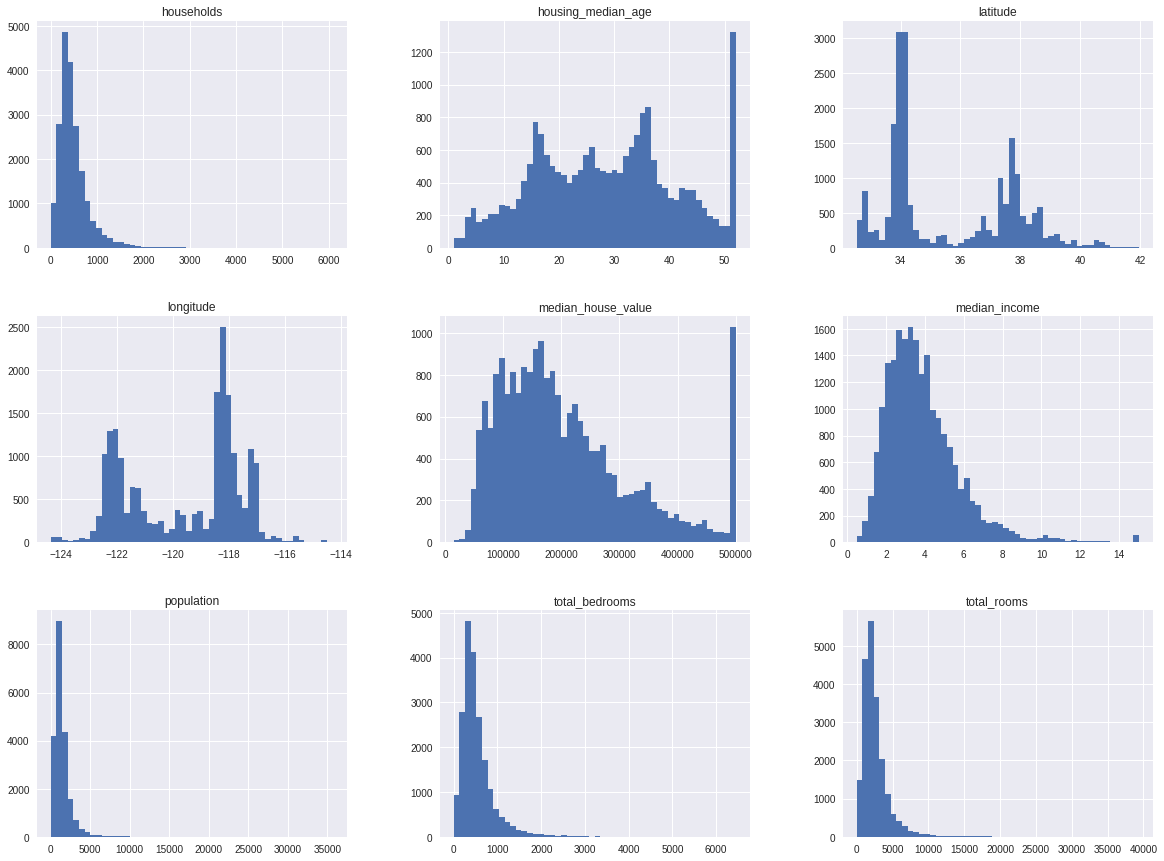

In [13]:
#histogram, 숫자형 데이터 특성을 빠르게 검토
%matplotlib inline
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(20,15))
plt.show()

In [14]:
#테스트 데이터 셋 만들기
#테스트용 데이터를 별도 저장함으로 데이터 스누핑 편향(Data snooping bias) 현상 방지 (테스트 셋 학습 방지)

from sklearn.model_selection import train_test_split

#train : test = 80 : 20
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

print("train: {}, test: {}".format(len(train_set), len(test_set)))

train: 16512, test: 4128


In [26]:
#계층적 샘플링
#테스트 셋이 전체 모수를 대표하도록 각 계층에서 올바른 수의 샘플을 추출 
#소득이 주택 가격을 예측하는데 중요하다면? -> 각 소득에서 일정한 비율로 골고루 샘플링

#소득의 카테고리 만들기
#1.5: 소득 카테고리 수를 제한하기 위한 값
import numpy as np
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["median_income"].head(), housing["income_cat"].head()

(0    8.3252
 1    8.3014
 2    7.2574
 3    5.6431
 4    3.8462
 Name: median_income, dtype: float64, 0    6.0
 1    6.0
 2    5.0
 3    4.0
 4    3.0
 Name: income_cat, dtype: float64)

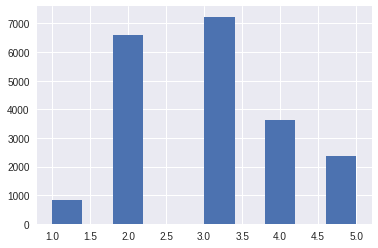

In [28]:
#5 이상인 값은 5로 합침
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

housing["income_cat"].hist()

In [29]:
#계층 샘플링
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing["income_cat"]):
  strat_train_set = housing.loc[train_index]
  strat_test_set = housing.loc[test_index]
  
#소득 카테고리 비율 살펴보기
housing["income_cat"].value_counts() / len(housing)

##전체적으로 8:2의 샘플링이 아니라, 계층을 각각 8:2의 비율로 샘플링을 한다 (데이터 분포를 고려)
##한쪽으로 치우쳐 있는 데이터 분포를 가지고 있다면 ==> StratifiedShuffleSplit
##그렇지않으면 어느 한 계층은 학습을 하지 못할 수도 있다

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64